In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [2]:
df.shape

(205, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [4]:
df.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [5]:
df.duplicated().sum()

0

#### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

In [6]:
df['Date'].nunique()

205

There is no contribution from the Date field as it is unique for each record and independent of the spent amount and profit. Hence dropping the same

In [7]:
df.drop('Date',inplace=True,axis=1)

In [9]:
df.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


In [11]:
df.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

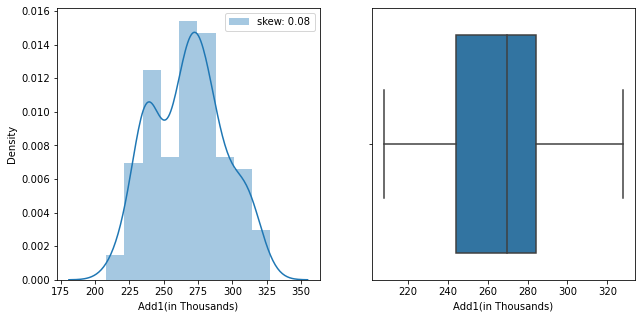

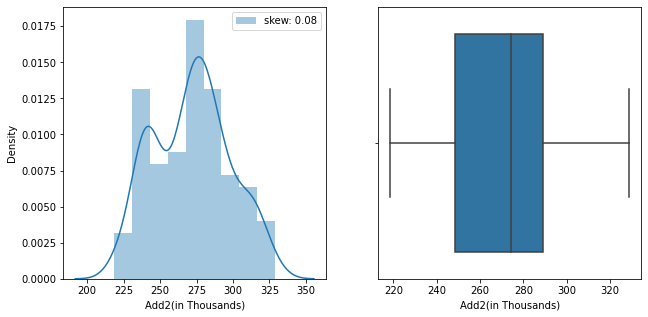

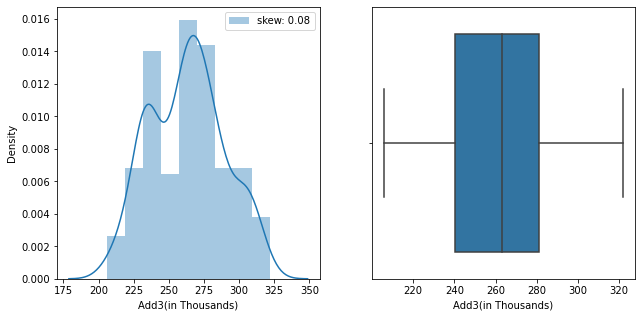

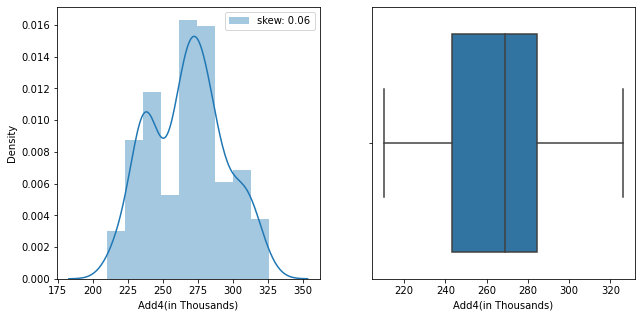

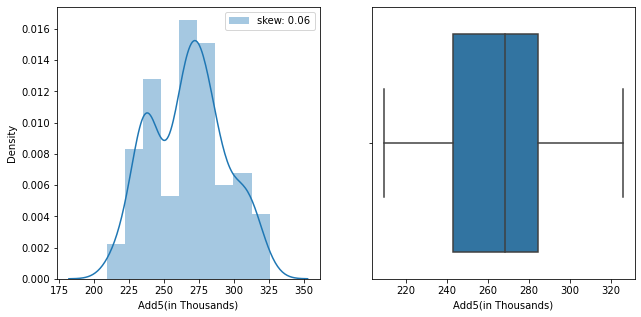

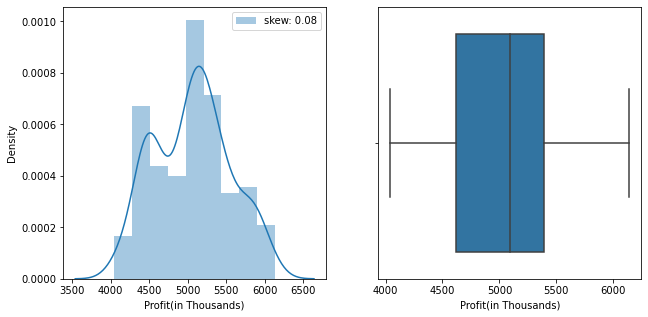

In [12]:
import warnings
warnings.filterwarnings('ignore')

features=['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)','Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)']
for col in features:
    plt.figure(figsize=(16,5))
    plt.subplot(131)
    sns.distplot(df[col],label='skew: '+ str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.show()

In [ ]:
There is no outliers present in any of the features.Hence we can directly find the correlation between each features

<AxesSubplot:>

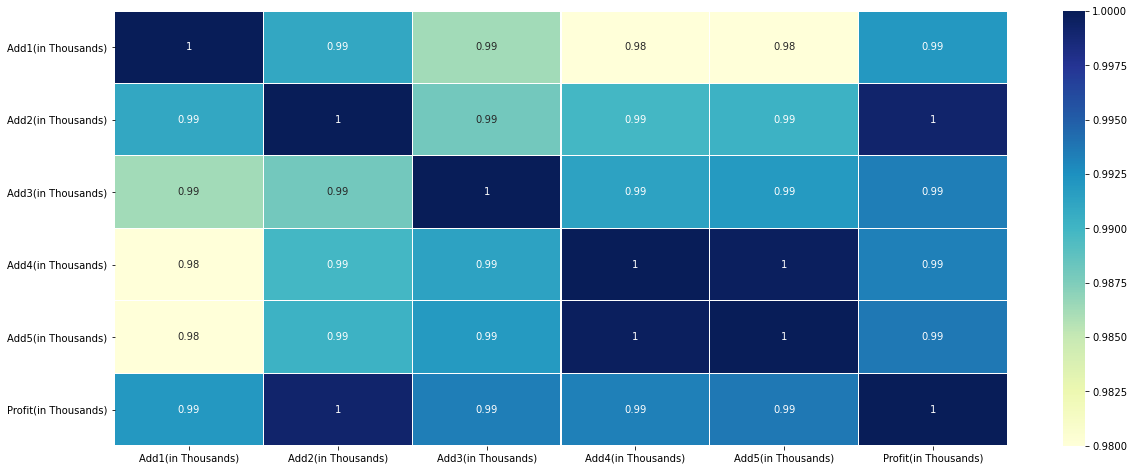

In [18]:
cormatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(cormatrix,vmin=0.980,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')

From the heatmap its very clear that there is high positive correlation between the amount spent and the profits. So increase in ad spend in any company will positively affect  the profit

#### 2.Build a regression model to predict the profit from the given data and comment your findings on it

In [19]:
df.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [20]:
y=df['Profit(in Thousands)']
X=df.drop('Profit(in Thousands)',axis=1)

In [23]:
#Training the datamodel with selected features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [24]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)# trained the model using train datasets and predicted the field 

In [26]:
y_test

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64

In [27]:
prediction

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788])

In [28]:
#compare the MSE and R-square value
from sklearn.metrics import mean_squared_error as msr
from sklearn.metrics import r2_score
print('MSE is :',msr(y_test,prediction))
print('R2_score is  :',r2_score(y_test,prediction))

MSE is : 5.850789698545805e-25
R2_score is  : 1.0


Observations:

1. From the ouput of y_test and predictions variables, the predicted values corresponding to x_test is
very much identical to the y_test.
2. The MSE is very low and R2_score is 1, showing our model is very accurate and a strong model

#### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) : 290

Add2(in Thousands) : 312

Add3(in Thousands) : 309

Add4(in Thousands) : 298

Add5(in Thousands) : 320

Pass the values provided to the regression model and find the profit

In [30]:
profit_new = lr.predict([[290,312,309,298,320]])

print('Profit predicted by model for the above spend amount is : ',profit_new)

Profit predicted by model for the above spend amount is :  [5820.06]
